We will be working with 3 files in our movie dataset:
1. movies_metadata - contains details about the movie like title, overview, revenue, genres, popularity, country, production houses, etc
2. credits - contains cast, crew of all movies
3. rating - contains ratings of movies from more than 10,000 users

## INTRODUCTION



In [2]:
import pandas as pd
import numpy as np
from ast import literal_eval
import matplotlib.pyplot as plt
import datetime
import calendar
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
pd.set_option('display.max_columns', 30)
pd.set_option('display.max_rows', 300)
%matplotlib inline

Reading dataset files

In [30]:
path = 'C:/python/the-movies-dataset/'
mv = pd.read_csv(path + "movies_metadata.csv")
cred=pd.read_csv(path + "credits.csv")
rt = pd.read_csv(path + "ratings.csv")

#deleting unwanted columns
del mv['poster_path']
del mv['homepage']
del mv['video']



Removing garbage rows from movies_metadata

In [31]:
temp = mv[mv.adult == 'False']
temp2 = mv[mv.adult == 'True']
mv = temp.append(temp2)


In [32]:
mv.rename(columns = {'id' : 'movieId'}, inplace = True)
cred.rename(columns = {'id' : 'movieId'}, inplace = True)
mv.movieId = mv.movieId.astype(int)
mv.set_index('movieId', inplace = True)
cred.movieId = cred.movieId.astype(int)
cred.set_index('movieId', inplace = True)

Calculating average user rating for each movie 

In [33]:
mean_rating = rt.groupby(by = ['movieId'], as_index = False)['rating'].mean()
mean_rating.movieId = mean_rating.movieId.astype(int)
mean_rating.set_index('movieId', inplace = True)

Blending credits and rating files with main movie_metadata file based on key - 'movieId':

In [34]:
mv = mv.join(cred)
mv = mv.join(mean_rating)
mv.head()

,adult,belongs_to_collection,budget,genres,imdb_id,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,rating
movieId,,,,,,,,,,,,,,,,,,,,,,,
2,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 80, 'name...",tt0094675,fi,Ariel,Taisto Kasurinen is a Finnish coal miner whose...,3.86049,"[{'name': 'Villealfa Filmproduction Oy', 'id':...","[{'iso_3166_1': 'FI', 'name': 'Finland'}]",1988-10-21,0.0,69.0,"[{'iso_639_1': 'fi', 'name': 'suomi'}, {'iso_6...",Released,NaN,Ariel,7.1,44.0,"[{'cast_id': 3, 'character': 'Taisto Olavi Kas...","[{'credit_id': '52fe420dc3a36847f800001f', 'de...",3.236953
3,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 35, 'name...",tt0092149,fi,Varjoja paratiisissa,"An episode in the life of Nikander, a garbage ...",2.29211,"[{'name': 'Villealfa Filmproduction Oy', 'id':...","[{'iso_3166_1': 'FI', 'name': 'Finland'}]",1986-10-16,0.0,76.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Shadows in Paradise,7.1,35.0,"[{'cast_id': 5, 'character': 'Nikander', 'cred...","[{'credit_id': '52fe420dc3a36847f8000077', 'de...",3.175550
5,False,NaN,4000000,"[{'id': 80, 'name': 'Crime'}, {'id': 35, 'name...",tt0113101,en,Four Rooms,It's Ted the Bellhop's first night on the job....,9.02659,"[{'name': 'Miramax Films', 'id': 14}, {'name':...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-09,4300000.0,98.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Twelve outrageous guests. Four scandalous requ...,Four Rooms,6.5,539.0,"[{'cast_id': 42, 'character': 'Ted the Bellhop...","[{'credit_id': '52fe420dc3a36847f800011b', 'de...",3.079565
6,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",tt0107286,en,Judgment Night,"While racing to a boxing match, Frank, Mike, J...",5.53867,"[{'name': 'Universal Pictures', 'id': 33}, {'n...","[{'iso_3166_1': 'JP', 'name': 'Japan'}, {'iso_...",1993-10-15,12136938.0,110.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Don't move. Don't whisper. Don't even breathe.,Judgment Night,6.4,79.0,"[{'cast_id': 7, 'character': 'Frank Wyatt', 'c...","[{'credit_id': '52fe420dc3a36847f800023d', 'de...",3.841764
11,False,"{'id': 10, 'name': 'Star Wars Collection', 'po...",11000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",tt0076759,en,Star Wars,Princess Leia is captured and held hostage by ...,42.1497,"[{'name': 'Lucasfilm', 'id': 1}, {'name': 'Twe...","[{'iso_3166_1': 'US', 'name': 'United States o...",1977-05-25,775398007.0,121.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"A long time ago in a galaxy far, far away...",Star Wars,8.1,6778.0,"[{'cast_id': 3, 'character': 'Luke Skywalker',...","[{'credit_id': '52fe420dc3a36847f8000437', 'de...",3.660591


In [35]:
mv.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'imdb_id',
       'original_language', 'original_title', 'overview', 'popularity',
       'production_companies', 'production_countries', 'release_date',
       'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'title',
       'vote_average', 'vote_count', 'cast', 'crew', 'rating'],
      dtype='object')

In [36]:
mv = mv[['title','adult', 'belongs_to_collection', 'budget', 'genres', 'imdb_id',
       'original_language', 'original_title', 'overview', 'popularity',
       'production_companies', 'production_countries', 'release_date',
       'revenue', 'runtime', 'spoken_languages', 'status', 'tagline',
       'vote_average', 'vote_count', 'cast', 'crew', 'rating']]
mv.head()

,title,adult,belongs_to_collection,budget,genres,imdb_id,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,vote_average,vote_count,cast,crew,rating
movieId,,,,,,,,,,,,,,,,,,,,,,,
2,Ariel,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 80, 'name...",tt0094675,fi,Ariel,Taisto Kasurinen is a Finnish coal miner whose...,3.86049,"[{'name': 'Villealfa Filmproduction Oy', 'id':...","[{'iso_3166_1': 'FI', 'name': 'Finland'}]",1988-10-21,0.0,69.0,"[{'iso_639_1': 'fi', 'name': 'suomi'}, {'iso_6...",Released,NaN,7.1,44.0,"[{'cast_id': 3, 'character': 'Taisto Olavi Kas...","[{'credit_id': '52fe420dc3a36847f800001f', 'de...",3.236953
3,Shadows in Paradise,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 35, 'name...",tt0092149,fi,Varjoja paratiisissa,"An episode in the life of Nikander, a garbage ...",2.29211,"[{'name': 'Villealfa Filmproduction Oy', 'id':...","[{'iso_3166_1': 'FI', 'name': 'Finland'}]",1986-10-16,0.0,76.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,7.1,35.0,"[{'cast_id': 5, 'character': 'Nikander', 'cred...","[{'credit_id': '52fe420dc3a36847f8000077', 'de...",3.175550
5,Four Rooms,False,NaN,4000000,"[{'id': 80, 'name': 'Crime'}, {'id': 35, 'name...",tt0113101,en,Four Rooms,It's Ted the Bellhop's first night on the job....,9.02659,"[{'name': 'Miramax Films', 'id': 14}, {'name':...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-09,4300000.0,98.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Twelve outrageous guests. Four scandalous requ...,6.5,539.0,"[{'cast_id': 42, 'character': 'Ted the Bellhop...","[{'credit_id': '52fe420dc3a36847f800011b', 'de...",3.079565
6,Judgment Night,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",tt0107286,en,Judgment Night,"While racing to a boxing match, Frank, Mike, J...",5.53867,"[{'name': 'Universal Pictures', 'id': 33}, {'n...","[{'iso_3166_1': 'JP', 'name': 'Japan'}, {'iso_...",1993-10-15,12136938.0,110.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Don't move. Don't whisper. Don't even breathe.,6.4,79.0,"[{'cast_id': 7, 'character': 'Frank Wyatt', 'c...","[{'credit_id': '52fe420dc3a36847f800023d', 'de...",3.841764
11,Star Wars,False,"{'id': 10, 'name': 'Star Wars Collection', 'po...",11000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",tt0076759,en,Star Wars,Princess Leia is captured and held hostage by ...,42.1497,"[{'name': 'Lucasfilm', 'id': 1}, {'name': 'Twe...","[{'iso_3166_1': 'US', 'name': 'United States o...",1977-05-25,775398007.0,121.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"A long time ago in a galaxy far, far away...",8.1,6778.0,"[{'cast_id': 3, 'character': 'Luke Skywalker',...","[{'credit_id': '52fe420dc3a36847f8000437', 'de...",3.660591


All cleaning operations will now be done on our main dataframe - mv.

 - belongs_to_collection, genres, production_countries, production_companies, spoken_languages columns are in a JSON object format. We will now reformat these columns to comma separated values of corresponding names. 
 - Replacing blank values in belongs_to_collection column with 'No Collection'

In [37]:
#reformatting column from JSON object to comma seperated values
mv['belongs_to_collection'] = mv['belongs_to_collection'].str.split(':|,',expand = True)[3]
#Replacing blank collection with no collection
mv['belongs_to_collection'] = mv['belongs_to_collection'].fillna('No Collection')

Converting JSON object to comma separated values in genres, production_countries, production_companies, spoken_language, cast column


In [38]:
#genres column
mv.genres = mv['genres'].fillna('').apply(literal_eval).apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else []) 
mv.count()

#production_countries column
mv['production_countries'] = mv['production_countries'].fillna('[]').apply(literal_eval).apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])
mv.head()


#production_companies
mv['production_companies'] = mv['production_companies'].fillna('[]').apply(literal_eval).apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])
mv.head()


#spoken_languages column
mv['spoken_languages'] = mv['spoken_languages'].fillna('[]').apply(literal_eval).apply(lambda x: [i['iso_639_1'] for i in x] if isinstance(x, list) else [])
mv.head()


#cast column
mv['cast'] = mv['cast'].fillna('[]').apply(literal_eval).apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])
mv.head()

#the crew column contains crew department and crew name in JSON object. We have seperated these key-values into 
#two columns - crew_department and crew_name as follows,

#mv['crew_department'] = mv['crew'].fillna('[]').apply(literal_eval).apply(lambda x: [i['department'] for i in x] if isinstance(x, list) else [])
#mv.head()
#mv['crew_name'] = mv['crew'].fillna('[]').apply(literal_eval).apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])


,title,adult,belongs_to_collection,budget,genres,imdb_id,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,vote_average,vote_count,cast,crew,rating
movieId,,,,,,,,,,,,,,,,,,,,,,,
2,Ariel,False,No Collection,0,"[Drama, Crime]",tt0094675,fi,Ariel,Taisto Kasurinen is a Finnish coal miner whose...,3.86049,"[Villealfa Filmproduction Oy, Finnish Film Fou...",[Finland],1988-10-21,0.0,69.0,"[fi, de]",Released,NaN,7.1,44.0,"[Turo Pajala, Susanna Haavisto, Matti Pellonpä...","[{'credit_id': '52fe420dc3a36847f800001f', 'de...",3.236953
3,Shadows in Paradise,False,No Collection,0,"[Drama, Comedy]",tt0092149,fi,Varjoja paratiisissa,"An episode in the life of Nikander, a garbage ...",2.29211,[Villealfa Filmproduction Oy],[Finland],1986-10-16,0.0,76.0,"[en, fi, sv]",Released,NaN,7.1,35.0,"[Matti Pellonpää, Kati Outinen, Sakari Kuosman...","[{'credit_id': '52fe420dc3a36847f8000077', 'de...",3.175550
5,Four Rooms,False,No Collection,4000000,"[Crime, Comedy]",tt0113101,en,Four Rooms,It's Ted the Bellhop's first night on the job....,9.02659,"[Miramax Films, A Band Apart]",[United States of America],1995-12-09,4300000.0,98.0,[en],Released,Twelve outrageous guests. Four scandalous requ...,6.5,539.0,"[Tim Roth, Antonio Banderas, Jennifer Beals, M...","[{'credit_id': '52fe420dc3a36847f800011b', 'de...",3.079565
6,Judgment Night,False,No Collection,0,"[Action, Thriller, Crime]",tt0107286,en,Judgment Night,"While racing to a boxing match, Frank, Mike, J...",5.53867,"[Universal Pictures, Largo Entertainment, JVC ...","[Japan, United States of America]",1993-10-15,12136938.0,110.0,[en],Released,Don't move. Don't whisper. Don't even breathe.,6.4,79.0,"[Emilio Estevez, Cuba Gooding Jr., Denis Leary...","[{'credit_id': '52fe420dc3a36847f800023d', 'de...",3.841764
11,Star Wars,False,'Star Wars Collection',11000000,"[Adventure, Action, Science Fiction]",tt0076759,en,Star Wars,Princess Leia is captured and held hostage by ...,42.1497,"[Lucasfilm, Twentieth Century Fox Film Corpora...",[United States of America],1977-05-25,775398007.0,121.0,[en],Released,"A long time ago in a galaxy far, far away...",8.1,6778.0,"[Mark Hamill, Harrison Ford, Carrie Fisher, Pe...","[{'credit_id': '52fe420dc3a36847f8000437', 'de...",3.660591


Removing movies who's status are Cancelled, in prod, rumoured, planned, blanks. 
These movies won't be required for our data analysis

In [39]:
mv = mv[(mv.status == 'In Production') | (mv.status == 'Released') | (mv.status == 'Post Production')]

 - Removing records where (popularity = 0 and runtime < 10) 
 - On observing dataset and based on domain research, we concluded that these records might represent garbage values. Hence removed  

In [40]:
mv.runtime = mv.runtime.fillna(0).astype(int, copy = True)
mv.popularity = mv.popularity.fillna(0).astype(float, copy = True)
mv = mv[(mv.popularity != 0) & (mv.runtime > 10)]



- Converting release date to datetime format

In [41]:
mv['release_date'] = mv['release_date'].apply(pd.to_datetime)
mv['release_date'].head(10)


movieId
2    1988-10-21
3    1986-10-16
5    1995-12-09
6    1993-10-15
11   1977-05-25
12   2003-05-30
13   1994-07-06
14   1999-09-15
15   1941-04-30
16   2000-05-17
Name: release_date, dtype: datetime64[ns]

In [42]:
mv.budget = pd.to_numeric(mv["budget"], errors = 'coerce')
mv["profit"] = mv["revenue"] - mv["budget"]

In [43]:
mv.head(5)

,title,adult,belongs_to_collection,budget,genres,imdb_id,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,vote_average,vote_count,cast,crew,rating,profit
movieId,,,,,,,,,,,,,,,,,,,,,,,,
2,Ariel,False,No Collection,0,"[Drama, Crime]",tt0094675,fi,Ariel,Taisto Kasurinen is a Finnish coal miner whose...,3.860491,"[Villealfa Filmproduction Oy, Finnish Film Fou...",[Finland],1988-10-21,0.0,69,"[fi, de]",Released,NaN,7.1,44.0,"[Turo Pajala, Susanna Haavisto, Matti Pellonpä...","[{'credit_id': '52fe420dc3a36847f800001f', 'de...",3.236953,0.0
3,Shadows in Paradise,False,No Collection,0,"[Drama, Comedy]",tt0092149,fi,Varjoja paratiisissa,"An episode in the life of Nikander, a garbage ...",2.292110,[Villealfa Filmproduction Oy],[Finland],1986-10-16,0.0,76,"[en, fi, sv]",Released,NaN,7.1,35.0,"[Matti Pellonpää, Kati Outinen, Sakari Kuosman...","[{'credit_id': '52fe420dc3a36847f8000077', 'de...",3.175550,0.0
5,Four Rooms,False,No Collection,4000000,"[Crime, Comedy]",tt0113101,en,Four Rooms,It's Ted the Bellhop's first night on the job....,9.026586,"[Miramax Films, A Band Apart]",[United States of America],1995-12-09,4300000.0,98,[en],Released,Twelve outrageous guests. Four scandalous requ...,6.5,539.0,"[Tim Roth, Antonio Banderas, Jennifer Beals, M...","[{'credit_id': '52fe420dc3a36847f800011b', 'de...",3.079565,300000.0
6,Judgment Night,False,No Collection,0,"[Action, Thriller, Crime]",tt0107286,en,Judgment Night,"While racing to a boxing match, Frank, Mike, J...",5.538671,"[Universal Pictures, Largo Entertainment, JVC ...","[Japan, United States of America]",1993-10-15,12136938.0,110,[en],Released,Don't move. Don't whisper. Don't even breathe.,6.4,79.0,"[Emilio Estevez, Cuba Gooding Jr., Denis Leary...","[{'credit_id': '52fe420dc3a36847f800023d', 'de...",3.841764,12136938.0
11,Star Wars,False,'Star Wars Collection',11000000,"[Adventure, Action, Science Fiction]",tt0076759,en,Star Wars,Princess Leia is captured and held hostage by ...,42.149697,"[Lucasfilm, Twentieth Century Fox Film Corpora...",[United States of America],1977-05-25,775398007.0,121,[en],Released,"A long time ago in a galaxy far, far away...",8.1,6778.0,"[Mark Hamill, Harrison Ford, Carrie Fisher, Pe...","[{'credit_id': '52fe420dc3a36847f8000437', 'de...",3.660591,764398007.0


### Calculating correlation among numerical variables to perform initial exploration

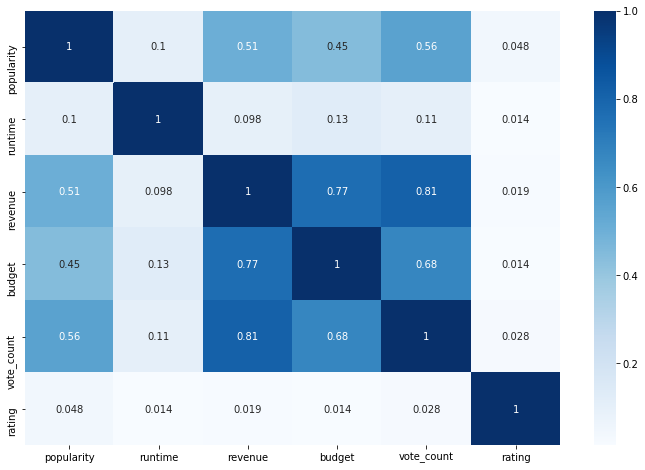

In [44]:
mv_corr = mv[['popularity', 'runtime', 'revenue', 'budget', 'vote_count', 'rating']].corr()
plt.figure(figsize = (12,8))
sns.heatmap(mv_corr,cmap='Blues',annot = True)

- We observe that there is strong positive correlation between - Budget and Revenue, Revenue and vote_count
- We can also see that there is a mild positive correlation between - Popularity and and vote_count, popularity and revenue
Inference: Since popularity of a movie can be quantified on the terms of votes it recieves therefore we observe a correlation between popularity and vote count. Furthermore as popularity of a movie increases we can assume that more people watch the movie which is also reflected in the form of correlation among the variables.

A strong correlation between revenue and budget needs further analysis.

Dropping NA values from release_date column

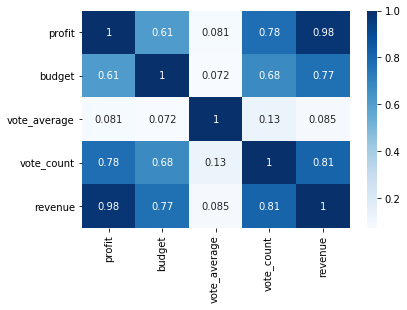

In [45]:
mv2_corr = mv[['profit','budget','vote_average', 'vote_count','revenue']].corr()
sns.heatmap(mv2_corr,cmap='Blues',annot = True)


Let us build a histogram to see count of movies released every month

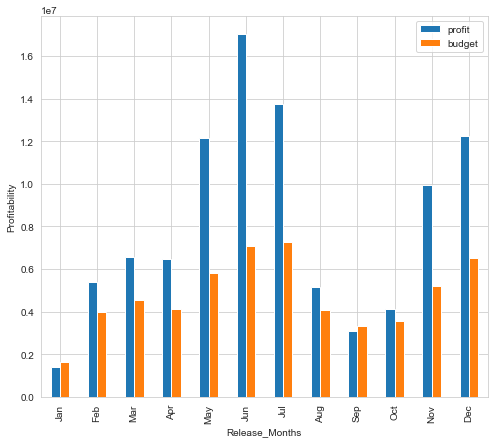

In [49]:
order=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
df=mv.copy()
df['release_date']=pd.to_datetime(df['release_date'],errors='coerce')
df['TMP'] = df.index.values                # index is a DateTimeIndex
df = df[df.TMP.notnull()]                  # remove all NaT values
df.drop(['TMP'], axis=1, inplace=True)

df=df[df.release_date.notnull()]
df['release_date']=pd.to_datetime(df['release_date'])
df['release_date']=pd.DatetimeIndex(df['release_date']).month
df['release_date']=df['release_date'].apply(lambda x: calendar.month_abbr[int(x)])

df_out = pd.DataFrame(df.groupby('release_date')['profit','budget'].mean())
df_out = df_out.reset_index()
hist=df_out.set_index('release_date').loc[order].plot(kind='bar',figsize=(8,7))
hist.set_xlabel("Release_Months")
hist.set_ylabel("Profitability")

plt.show(hist)


We can see that more than 5000 out of 45,000 movies were released in January. While least movies were released in the month of July

### Observing distribution of above graph for outliers

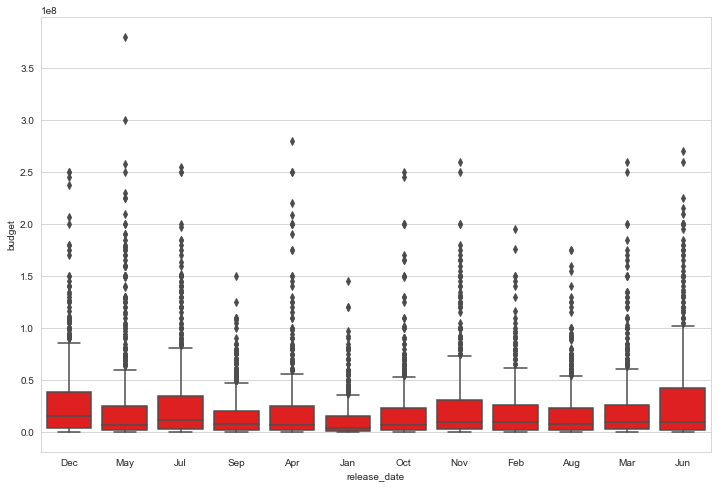

In [48]:
df = df[df.budget > 0]
sns.set_style("whitegrid") 
plt.figure(figsize = (12,8))
plt.ylabel('Budget')
plt.xlabel('Months')
sns.boxplot(x = 'release_date', y = 'budget', data = df, color = 'Red')

Plotting a bar chart to visualize total number of movies released till 2010 in each month

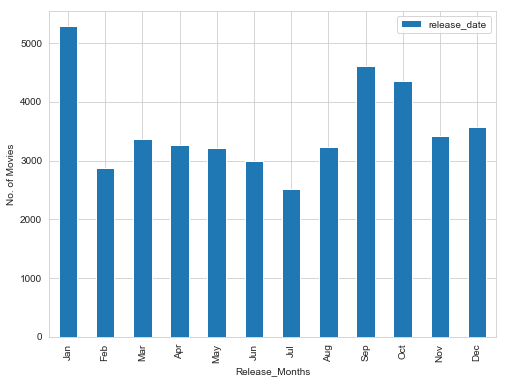

In [50]:
order=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
df=mv.copy()
df['release_date']=pd.to_datetime(df['release_date'],errors='coerce')
df['TMP'] = df.index.values                # index is a DateTimeIndex
df = df[df.TMP.notnull()]                  # remove all NaT values
df.drop(['TMP'], axis=1, inplace=True)

df=df[df.release_date.notnull()]
df['release_date']=pd.to_datetime(df['release_date'])
df['release_date']=pd.DatetimeIndex(df['release_date']).month
df['release_date']=df['release_date'].apply(lambda x: calendar.month_abbr[int(x)])

df_out = pd.DataFrame(df.release_date.value_counts())
df_out = df_out.reset_index()
hist=df_out.set_index('index').loc[order].plot(kind='bar',figsize=(8,6))
hist.set_xlabel("Release_Months")
hist.set_ylabel("No. of Movies")
hist

# Vote Count Trend across Decades 

For analyzing the trend of vote counts across different decades firstly extracted year from release date and merged different years into decades. Then plotted line plot to show the trend of voting across different decades. From the below plot it is eveident that from 1990 onwards there is exponential increase in voting counts for various movies.

In [51]:
temp = mv.copy()
temp.release_date.dropna(inplace = True)
df_new=temp.copy()
df_new=df_new[df_new.release_date.notnull()]
df_new['release_year']=pd.to_datetime(df_new['release_date'])
df_new['release_year']=pd.DatetimeIndex(df_new['release_date']).year

Text(0.5, 1.0, 'Trend of vote count throughout decades')

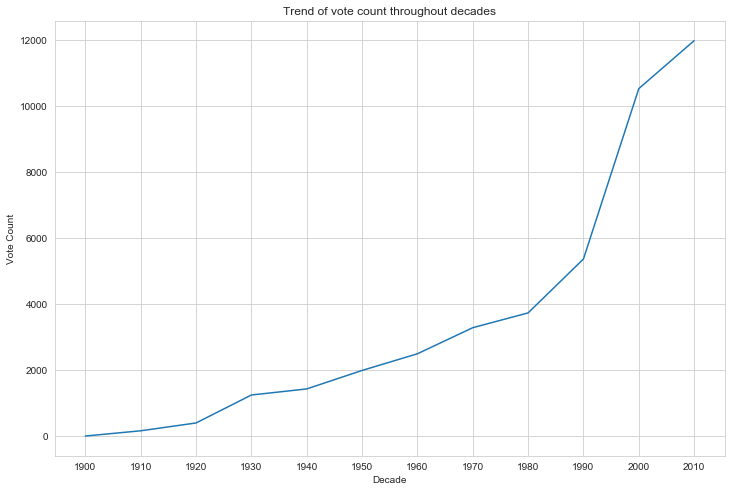

In [52]:
# Extracting year from release date for trend analysis
import math
def extract_decade(x):
    return str(math.floor(x/10)*10)

# Binning the release years into bins of decades for a decade wise analysis
df_new["decade"] = df_new["release_year"].apply(extract_decade)
df_new = df_new.sort_values(by=['decade'], ascending=True)
df_by_vote = df_new.groupby(['decade']).vote_count.count().reset_index()
#plotting votecount trend
plt.figure(figsize = (12,8))
sns.lineplot(df_by_vote['decade'],df_by_vote["vote_count"]) 
plt.ylabel('Vote Count')
plt.xlabel('Decade')
plt.title('Trend of vote count throughout decades')

# Analyzing the popular Genres

For movie producers it is helpful to know the genres trending so that they can produce movies related to those genres to incur more profit.Hence we have extracted different genres a particular movie belongs to from the list of genres and calculated the total count of each genre. Plotted a bar gragh to showcase the top genres of movie produced in last 100 years.

Below is the method to separate genre of each movie from the list of Genres.

In [53]:
s = df_new.apply(lambda x: pd.Series(x['genres']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'genre'
df_new = df_new.drop('genres', axis=1).join(s)

From the below bar graph it is evedent that the leading 3 genres are drama,comedy and thriller in last 100 years.This provides the information that movies on war, history and western style are least exploited hence producers can decide wether to go with the movie in leading trends or less exploited genres.

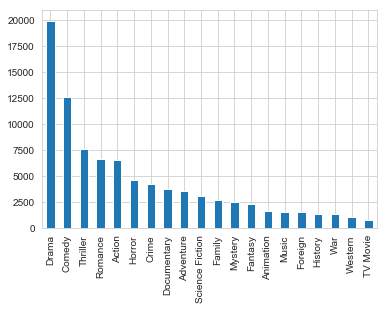

In [54]:
df_new['genre'].value_counts().plot.bar()

Besides the leading genres how each leading genre has performed through out 100 years also provides vital information for movie production. The trend of the genres can provide insights on movie production for leading genres in each decade. For this information a graph of count of leading 3 genres versus each decade is plotted as visualization.

In [55]:
df_by_genre_drama = df_new.loc[df_new['genre'] == 'Drama']
df_by_genre_drama
df_drama = df_by_genre_drama.groupby(['decade']).genre.count().reset_index()
df_drama
df_by_genre_comedy = df_new.loc[df_new['genre'] == 'Comedy']
df_by_genre_comedy
df_comedy = df_by_genre_comedy.groupby(['decade']).genre.count().reset_index()
df_by_genre_thriller = df_new.loc[df_new['genre'] == 'Thriller']
df_by_genre_thriller
df_thriller = df_by_genre_thriller.groupby(['decade']).genre.count().reset_index()

From the below line plot it is evident that irrespective of genres movie produced during 1980 to 2000 has increased expontially showing the movie production during these three decades are commendable.But from 2000 to 2010 movies produce on drama has decreased, movies on comedy have remained same where as movies on thiller has increased slightly.

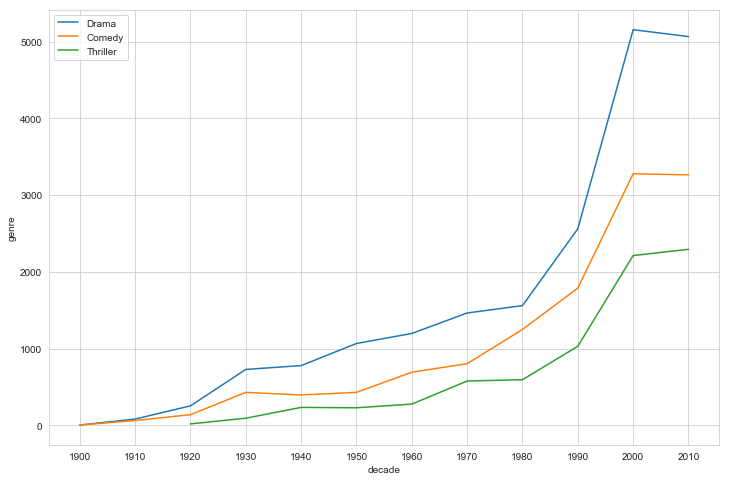

In [56]:
plt.figure(figsize = (12,8))
sns.lineplot(df_drama['decade'],df_drama["genre"],label="Drama") 
sns.lineplot(df_comedy['decade'],df_comedy["genre"],label="Comedy") 
sns.lineplot(df_thriller['decade'],df_thriller["genre"],label="Thriller" )

# Analyzing new genre called TV Movie

From above line plot it is evident the production of movies in recent has remained similar for the Top genres. When we analysed the lowest produced genre called TV movies interesting facts came out. This Genre is pretty new hence has less count through out the century. But the trend in which the TV Movies are produced in last 30 years is impressive thanks to the TV Platforms like NETFLIX, AMAZON Prime etc

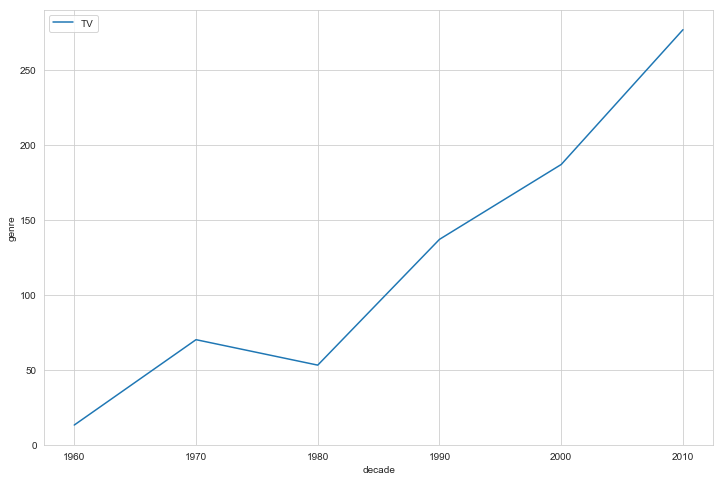

In [57]:
#Counting the number of movies categoried as TV Movies produced under each decade
df_by_genre_TV = df_new.loc[df_new['genre'] == 'TV Movie']
df_by_genre_TV
df_TV= df_by_genre_TV.groupby(['decade']).genre.count().reset_index()
plt.figure(figsize = (12,8))
sns.lineplot(df_TV['decade'],df_TV["genre"],label="TV" )

### Average Rating of genre over decades

In [58]:
# Counting vote counts for the Comedy, Drama and TV Movie in each decade.
grouped_data_drama = df_by_genre_drama.groupby(["decade"]).vote_average.mean().reset_index()
grouped_data_drama
grouped_data_comedy = df_by_genre_comedy.groupby(["decade"]).vote_average.mean().reset_index()
grouped_data_comedy
grouped_data_thriller = df_by_genre_thriller.groupby(["decade"]).vote_average.mean().reset_index()
grouped_data_thriller
grouped_data_TV = df_by_genre_TV.groupby(["decade"]).vote_average.mean().reset_index()

Text(0.5, 1.0, 'Average Rating of genre over decades')

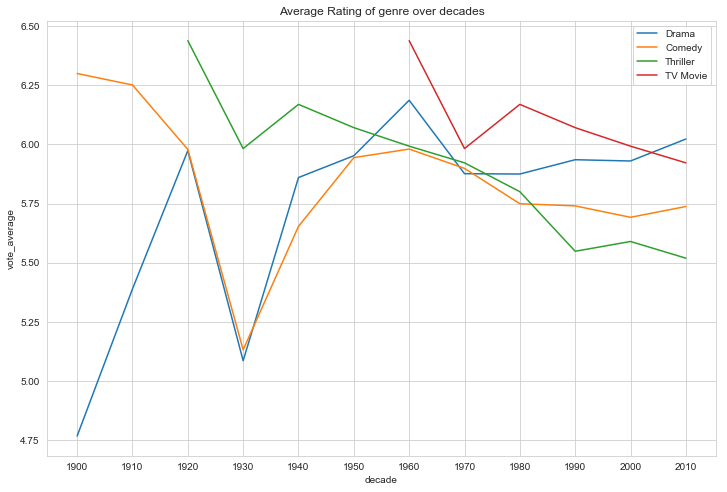

In [59]:
plt.figure(figsize = (12,8))
sns.lineplot(grouped_data_drama['decade'],grouped_data_drama["vote_average"],label="Drama") 
sns.lineplot(grouped_data_comedy['decade'],grouped_data_comedy["vote_average"],label="Comedy") 
sns.lineplot(grouped_data_thriller['decade'],grouped_data_thriller["vote_average"],label="Thriller" ) 
sns.lineplot(grouped_data_TV['decade'],grouped_data_thriller["vote_average"],label="TV Movie" ) 
plt.title('Average Rating of genre over decades')

### ANALYSING THE ROLE OF DIRECTORS

In [60]:
#Generating a new column as director
temp = mv[mv.adult == 'False']
temp2 = mv[mv.adult == 'True']
mv = temp.append(temp2)
mv_new = mv.copy()
mv_new.dropna(subset=["crew"],inplace=True)
mv['crew'] = mv['crew'].apply(literal_eval)

In [61]:
def get_director(x):
    for i in x:
        if i['job'] == 'Director':
            return i['name']
    return np.nan

mv['director'] = mv['crew'].apply(get_director)

In [62]:
directors= pd.DataFrame(mv.groupby(by = 'director')['director'].count())
directors.columns = ['count']
directors.sort_values(by = 'count', ascending = False)
directors.reset_index(inplace = True)
mv = mv.merge(directors, on = 'director', how = 'left')
mv.count = pd.to_numeric(mv.count, errors = 'ignore')

### We have plotted the graph of most profitable directors who have directed more than 5 movies

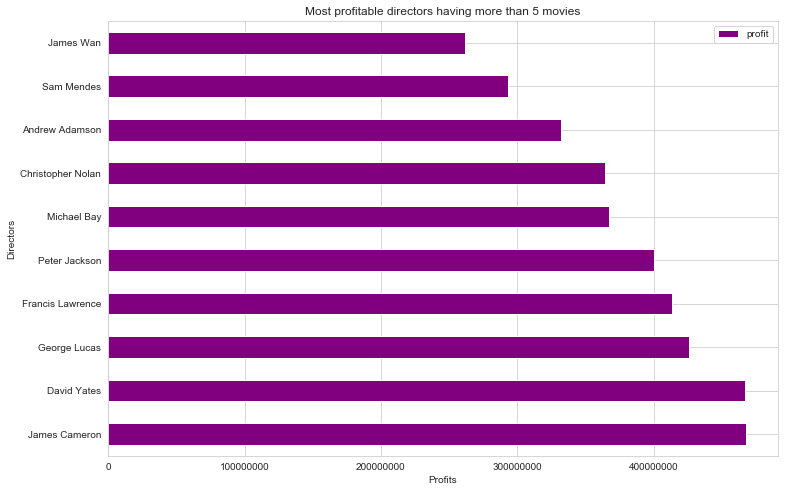

In [63]:
temp = mv.loc[mv['count'] >= 5]
mv_profit = temp.dropna(subset = ['budget', 'revenue', 'profit']) 
counts = mv.director.value_counts()
director_profit = mv[mv['count'] > 5].groupby(by = 'director', as_index= False)['profit'].mean().sort_values(by = 'profit', ascending = False).iloc[:10]
ax = director_profit.plot('director', 'profit',title = 'Most profitable directors having more than 5 movies', kind = 'barh',figsize = (12,8), color = 'Purple')
ticks =  ax.get_xticks()
plt.ylabel('Directors')
plt.xlabel('Profits')
# set labels to absolute values and with integer representation
ax.set_xticklabels([int(abs(tick)) for tick in ticks])
plt.show()

### Plotting the chart of Directors who have proved to be very profittable and have produced atleast 5 movies.

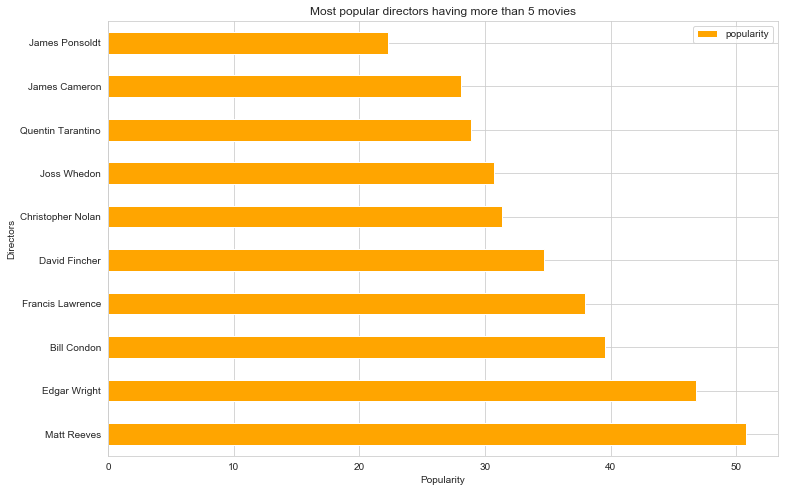

In [64]:
mv_pop = temp.dropna(subset = ['popularity']) 
counts = mv.director.value_counts()
director_pop = mv[mv['count'] >= 5].groupby(by = 'director', as_index= False)['popularity'].mean().sort_values(by = 'popularity', ascending = False).iloc[:10]
ax = director_pop.plot('director', 'popularity',title = 'Most popular directors having more than 5 movies', color = 'Orange', kind = 'barh',figsize = (12,8))
ticks =  ax.get_xticks()
plt.ylabel('Directors')
plt.xlabel('Popularity')
# set labels to absolute values and with integer representation
ax.set_xticklabels([int(abs(tick)) for tick in ticks])
plt.show()

C:\Users\punya\Anaconda3\lib\site-packages\pandas\core\generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


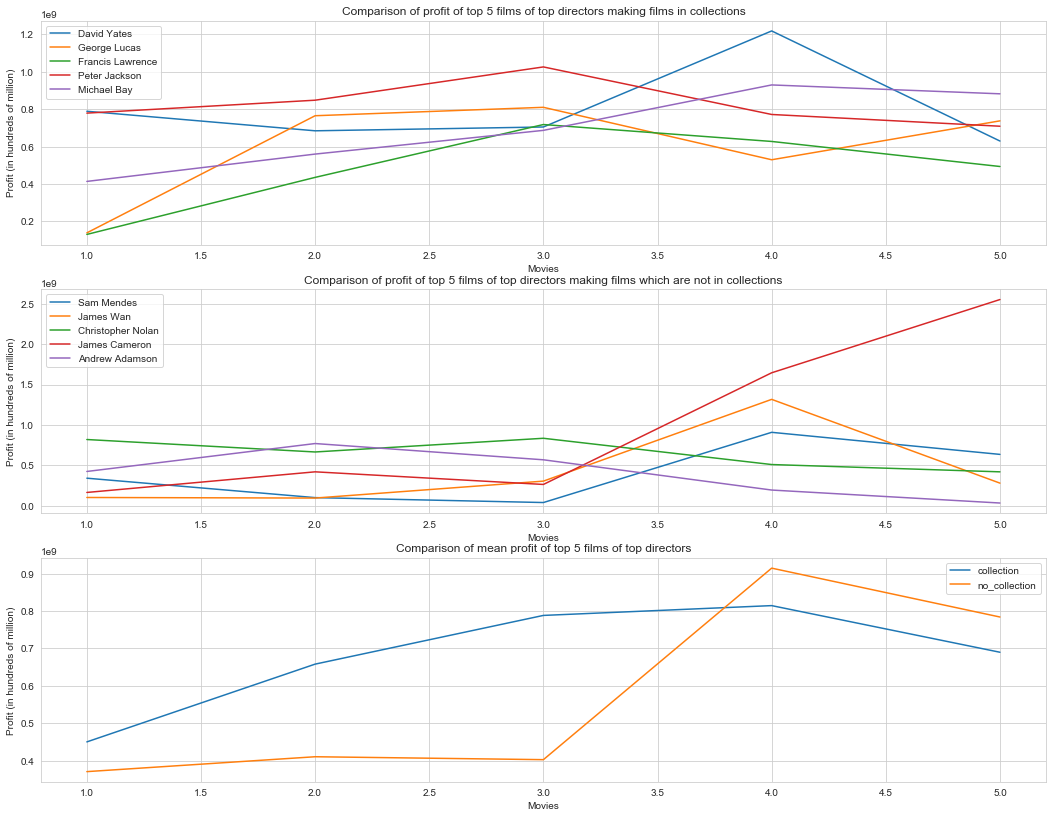

In [72]:
k = mv[(mv['count'] > 5) & (mv['profit'] > 0)]
k = pd.DataFrame(k[['director', 'title', 'profit']].groupby(by = ['director', 'title'])['profit'].mean())
k.columns = ['profit']
k = k['profit'].groupby(level = 0, group_keys = False).nlargest(5).reset_index()
#filtering directors who have directed film collections
collec_directors = ['David Yates', 'George Lucas', 'Francis Lawrence', 'Peter Jackson', 'Michael Bay']
nocollec_directors = ['Sam Mendes', 'James Wan', 'Christopher Nolan', 'James Cameron', 'Andrew Adamson']
k = k[k['director'].isin(director_profit.director)] 
merged = pd.merge(left = k, right = pd.DataFrame(df_new[['belongs_to_collection', 'title', 'release_year']]), how = 'left', left_on = 'title', right_on = 'title')
merged.drop_duplicates(inplace = True)
merged.drop([26, 38, 99, 102], inplace = True)
merged.sort_values(by = ['director', 'release_year'], inplace = True)
merged['number'] = list(range(1,6)) * 10
plt.figure(figsize = (18,14))
plt.subplot(3,1,1)
for i in list(collec_directors):
    ax = sns.lineplot(merged['number'],merged["profit"][merged.director == i], label=i)
    plt.title ('Comparison of profit of top 5 films of top directors making films in collections')
    plt.ylabel('Profit (in hundreds of million)')
    plt.xlabel('Movies')
plt.subplot(3,1,2)
for i in list(nocollec_directors):
    ax = sns.lineplot(merged['number'],merged["profit"][merged.director == i], label=i)
    plt.title ('Comparison of profit of top 5 films of top directors making films which are not in collections')
    plt.ylabel('Profit (in hundreds of million)')
    plt.xlabel('Movies')
plt.subplot(3,1,3)
collec = merged[merged.director.isin(collec_directors)]
nocollec = merged[merged.director.isin(nocollec_directors)]
collec.belongs_to_collection = 'collection'
nocollec.belongs_to_collection = 'no_collection'
concatted = collec.append(nocollec).sort_values(by = 'release_year')
concatted = concatted.groupby(by = ['belongs_to_collection', 'number'])['profit'].mean().reset_index()
for i in ['collection', 'no_collection']:
    ax = sns.lineplot(concatted['number'],concatted["profit"][concatted.belongs_to_collection == i], label = i)
    plt.title ('Comparison of mean profit of top 5 films of top directors')
    plt.ylabel('Profit (in hundreds of million)')
    plt.xlabel('Movies')

In [65]:
director_revenue = mv.groupby(by = 'director', as_index= False)['revenue'].mean().sort_values(by = 'revenue', ascending = False).iloc[:10]

### SUMMARIZING TOP 10 MOVIES WITH RESPECT TO GENRES BASED ON DIFFERENT CRITERIAS

In [66]:
df_new["budget"] = pd.to_numeric(df_new.budget, errors='coerce')
df_new["profit"] = df_new["revenue"] - df_new["budget"]
df_new_sorted=df_new.sort_values(by=['vote_average'],ascending= False)
df = pd.DataFrame(df_new_sorted.groupby(by =[ 'genre', 'title'])["vote_average"].mean())
g = df['vote_average'].groupby(level=0,group_keys=False)
display(pd.DataFrame(g.nlargest(10)))

vote_average
genre           title                                                           
Action          Backyard Dogs                                               10.0
                High Roller: The Stu Ungar Story                            10.0
                Mortal Kombat: The Journey Begins                           10.0
                Oh, Bomb!                                                   10.0
                Pan                                                         10.0
                Ten Benny                                                   10.0
                The Lion of Thebes                                          10.0
                Tokyo Ghoul                                                 10.0
                One Man's Hero                                               9.3
                The River Thief                                              9.3
Adventure       Back to School with Franklin                                10.0
                Girl in the Cadillac                                        10.0
                Shark Kill                                                  10.0
                Symphony of the Soil                                        10.0
                The Lion of Thebes                                          10.0
                King of Katoren                                              9.5
                The River Thief                                              9.3
                Arabella, the Pirate's Daughter                              9.0
                From Mexico With Love                                        9.0
                Frontier                                                     9.0
Animation       Back to School with Franklin                                10.0
                Claymation Comedy of Horrors                                10.0
                Mortal Kombat: The Journey Begins                           10.0
                Kizumonogatari Part 3: Reiketsu                              9.4
                Rocks in my Pockets                                          9.4
                Lotte from Gadgetville                                       9.0
                The Grinch Grinches the Cat in the Hat                       9.0
                The Weathering Continent                                     9.0
                Kizumonogatari Part 2: Nekketsu                              8.9
                Fuse, Memoirs of the Hunter Girl                             8.8
Comedy          A Ticklish Affair                                           10.0
                American Sharia                                             10.0
                Backyard Dogs                                               10.0
                Blessed Event                                               10.0
                Bowery Battalion                                            10.0
                Chilly Scenes of Winter                                     10.0
                Christopher Titus: Angry Pursuit of Happiness               10.0
                Crooks and Coronets                                         10.0
                Dancer, Texas Pop. 81                                       10.0
                Der Herr Karl                                               10.0
Crime           American Hostage                                            10.0
                Girl in the Cadillac                                        10.0
                Oh, Bomb!                                                   10.0
                The Great Kidnapping                                        10.0
                The Walking Stick                                           10.0
                The Biggest Bundle of Them All                               9.5
                The River Thief                                              9.3
                Gold                                                         9.0
                Po

### Above table gives a list of top 10 highest rated movies under each genre

In [69]:
df_new_sorted=df_new.sort_values(by=['profit'],ascending= False)
df = pd.DataFrame(df_new_sorted.groupby(by =[ 'genre', 'title'])["profit"].mean())
g = df['profit'].groupby(level=0,group_keys=False)
v_old= pd.DataFrame(g.nlargest(10))
v_old = v_old.drop(['profit'], axis=1)
v_old = v_old.reset_index()
v_old = v_old.set_index('genre')
v_old.columns = ['Titles by Profit']

In [70]:
df_new_sorted=df_new.sort_values(by=['popularity'],ascending= False)
df = pd.DataFrame(df_new_sorted.groupby(by =[ 'genre', 'title'])["popularity"].mean())
g = df['popularity'].groupby(level=0,group_keys=False)
v_new = pd.DataFrame(g.nlargest(10))
v_new = v_new.drop(['popularity'], axis=1)
v_new = v_new.reset_index()
v_new = v_new.set_index('genre')
v_new.columns =['Titles by Popularity'] 

In [71]:
v = pd.concat([v_old,v_new], axis = 1)
v.head(20)

,Titles by Profit,Titles by Popularity
genre,,
Action,Avatar,Baby Driver
Action,Star Wars: The Force Awakens,Big Hero 6
Action,Jurassic World,Deadpool
Action,Furious 7,Guardians of the Galaxy Vol. 2
Action,The Avengers,Avatar
Action,Avengers: Age of Ultron,John Wick
Action,The Lord of the Rings: The Return of the King,Captain America: Civil War
Action,Iron Man 3,Pirates of the Caribbean: Dead Men Tell No Tales
Action,The Fate of the Furious,Wonder Woman
